In [2]:
import sys
import os
import pandas as pd

# Add the absolute path to the scripts folder
scripts_path = os.path.abspath("../scripts")
sys.path.append(scripts_path)

from training import (
    build_logreg_pipeline,
    evaluate_pipeline_cv,
    train_and_evaluate,
    run_grid_search,
    build_tree_pipeline, 
    evaluate_tree_cv, 
    train_and_evaluate_tree
)
from sklearn.model_selection import TimeSeriesSplit 
from evaluation import evaluate_model


### Logistic Regression

In [3]:
import pandas as pd

train_final = pd.read_csv(r"C:\Users\DELL\OneDrive\Data Science\Bank_Telemarketing_Prediction_EDSB25_1\data\processed\train_processed.csv")
test_final  = pd.read_csv(r"C:\Users\DELL\OneDrive\Data Science\Bank_Telemarketing_Prediction_EDSB25_1\data/processed/test_processed.csv")

X_train = train_final.drop(columns=["y"])
y_train = train_final["y"]

X_test = test_final.drop(columns=["y"])
y_test = test_final["y"]

In [4]:
logreg_pipe = build_logreg_pipeline(random_state=42)

In [5]:
fold_scores, mean_score = evaluate_pipeline_cv(logreg_pipe, X_train, y_train, n_splits=5, scoring="roc_auc")

ROC-AUC for each fold:
  Fold 1: 0.5143
  Fold 2: 0.5050
  Fold 3: 0.5051
  Fold 4: 0.5635
  Fold 5: 0.6326

Mean CV ROC-AUC: 0.5441


In [6]:
test_metrics = train_and_evaluate(logreg_pipe, X_train, y_train, X_test, y_test)


Test Results:
Accuracy: 0.5460415859485988
Precision: 0.3958461854822126
Recall: 0.7693844924060751
F1: 0.5227427019687713
ROC-AUC: 0.6814993721489133


In [11]:

# Defines param grid

param_grid = {
    "model__C": [0.01, 0.1, 1,5, 10],
    "model__class_weight": ["balanced", None],
    "model__penalty": ["l1", "l2", "elasticnet", None],
    "model__solver": ["liblinear", "saga"],
    "model__max_iter": [100, 200, 500]
}





# Run grid search
tscv = TimeSeriesSplit(n_splits=5)
best_params, best_score, test_metrics = run_grid_search(
    logreg_pipe, param_grid, X_train, y_train, X_test, y_test, cv=tscv
)


KeyboardInterrupt: 


==================== Logistic Regression — TRAINING vs TEST EVALUATION ====================



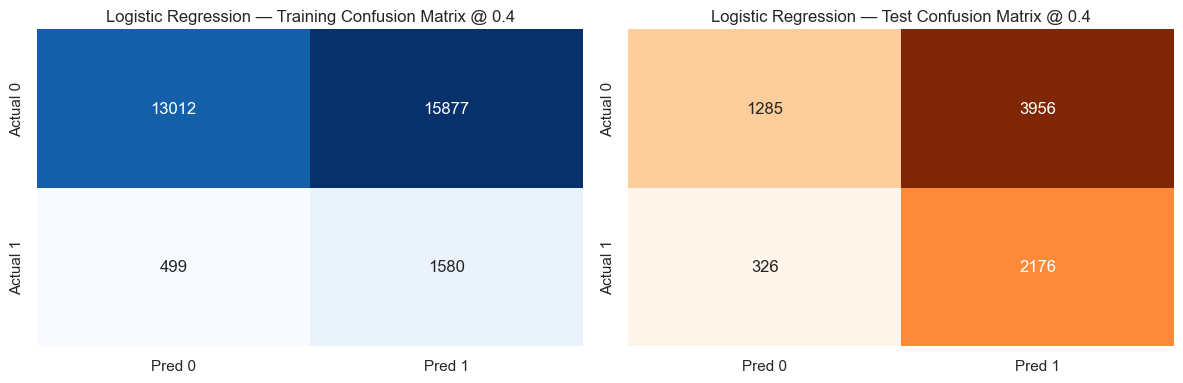

Training Metrics
----------------
Accuracy  : 0.4712
Precision : 0.0905
Recall    : 0.7600
F1        : 0.1618
Roc_auc   : 0.6818

Test Metrics
------------
Accuracy  : 0.4470
Precision : 0.3549
Recall    : 0.8697
F1        : 0.5041
Roc_auc   : 0.6815


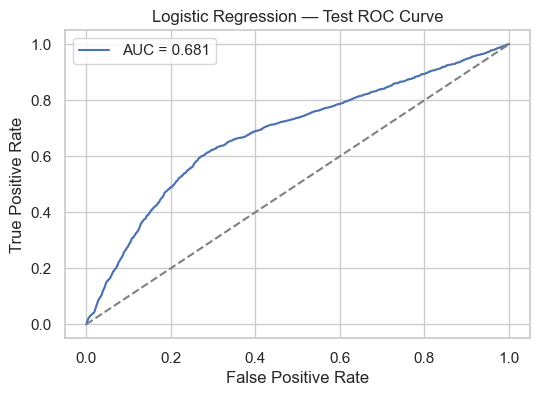

In [ ]:
logreg_pipe.fit(X_train, y_train)
results = evaluate_model(logreg_pipe, X_train, y_train, X_test, y_test, model_name="Logistic Regression",threshold=0.4)

### Decision Trees


In [9]:
from training import build_tree_pipeline, evaluate_tree_cv, train_and_evaluate_tree

tree_pipe = build_tree_pipeline(random_state=42)

# Cross-validation with ROC-AUC per fold
cv_scores = evaluate_tree_cv(tree_pipe, X_train, y_train, n_splits=5)

# Train + evaluate on test set
metrics = train_and_evaluate_tree(tree_pipe, X_train, y_train, X_test, y_test)

ROC-AUC for each fold:
  Fold 1: 0.4870
  Fold 2: 0.4998
  Fold 3: 0.4871
  Fold 4: 0.4816
  Fold 5: 0.5391

Mean CV ROC-AUC: 0.4989

Test Results:
Accuracy  : 0.6383
Precision : 0.3609
Recall    : 0.1551
F1        : 0.2169
Roc_auc   : 0.5119
